# Imports

In [1]:
#Enable matplotlib to display in jupyter notebook & import it
%matplotlib inline

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import re
from geopy.geocoders import Nominatim #used in filling missing zipcodes
import math


# Reading Files

In [2]:
#Read Files
#"originals" should never be modified.  They exist to check work.  They should be deleted in our final work
listings_original = pd.read_csv('data/listings.csv')
calendar_oiginal = pd.read_csv('data/calendar.csv')
reviews_original = pd.read_csv('data/reviews.csv')

listings = listings_original.copy()
calendar = calendar_oiginal.copy()
reviews = reviews_original.copy()

# #Final version should just have the code below
# listings = pd.read_csv('data/listings.csv')
# calendar = pd.read_csv('data/calendar.csv')
# reviews = pd.read_csv('data/reviews.csv')


# Clean the Data

## Listings Data

In [3]:
print('start')
#for testing
listings = listings_original.copy()

###remove hosts who have never responded to or received a message
#there are better ways to do this
#unused_listings = listings[listings.host_response_time.isnull()].copy()
#listings = listings[listings.host_response_time.notnull()]

#listings.columns[(listings.isnull().sum()==3585)]
#returns these (empty variables)
#Index(['neighbourhood_group_cleansed', 'has_availability', 'license','jurisdiction_names'],
      
      
# Description:  
# Original shape = (3585, 95)

# id
# Type: Float
# What: The listing id is a unique id # for each property being listed on airBnB
# Cleaning: SET AS INDEX

#listings.index = set_index('id', inplace=True) #this also sets index but doesn't leave me with id as a column
listings.index = listings.id.copy()

# listing_url
# Type: String
# What: Url in for the listing in the format: "https://www.airbnb.com/rooms/" + listing.id
# Cleaning: leave in for easy access to listings while exploring data

# scrape_id
# Type: int
# What: Identify which webscrape the data came from, all of Boston came from the same scrape: 20160906204935
#Cleaning: Delete.  Not relevant to our analysis
del(listings['scrape_id'])

# last_scraped
# Type: str
# What: The date that our data was scraped, it is the same for all of Boston entries: 2016-09-07
# Cleaning : Convert to date
listings.last_scraped = pd.to_datetime(listings.last_scraped)

# name
# Type: str
# What: This text is the "title" of any listing.  In a search result it would 
#       be the text that users see as the first description of a listing.  It
#       is also the title of the page for a listing in browser history. etc.
# Cleaning:  None
# Uses: keyword analysis
pass

# summary
# Type: str or NaN
# What: Prose that is displayed on listing webpage for "About this listing".
# Cleaning: Fill NaN with "" so that all types match
# Uses: Keyword analysis
pass
len(listings.summary.unique()) #=3114
listings.summary = listings.summary.fillna('')
listings.summary[listings.summary == ''].count() #=143
listings.summary.value_counts().index[1] #most common summary other than ""
listings[listings.summary == listings.summary.value_counts().index[1]]
#more exploration of duplicates needed


# space
# Type: str or NaN
# What: [OPTIONAL] Prose to describe the inside space of a listing
# Cleaning: Fill NaN with "" so that all types match
listings.space.isnull().any()
len(listings.space.unique()) #=2269
listings.space = listings.space.fillna('')
listings.space[listings.space == ''].count() #=1057
listings.space.value_counts()
#more exploration of duplicates needed

# description
# Type: str
# What: Prose that contains the first 1000 characters of the merging of other descriptive prose:
#     summary
#     space
#     experiences_offered
#     neighborhood_overview
#     notes
#     transit
#     access
#     interaction
#     house_rules
# Cleaning: Delete.  the fact that it only gives us the first 1000 characters makes it unuseful.
del(listings['description'])

# experiences_offered
# Type: str
# What: 'none' for every entry
# Cleaning: Delete
del(listings['experiences_offered'])

# neighborhood_overview
# Type: str or NaN
# What: [OPTIONAL] description by host of the neighborhood 
# Cleaning: Fill NaN with "" so that all types match
listings.neighborhood_overview.isnull().sum() #=1415
len(listings.neighborhood_overview.unique()) #=1729
listings.neighborhood_overview = listings.neighborhood_overview.fillna('')
#more exploration of duplicates needed

# notes
# Type: str or NaN
# What: [OPTIONAL] under "Other things to note" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.notes.isnull().sum() #=1975
listings.notes = listings.notes.fillna('')
len(listings.notes.unique()) #=1270
#more exploration of duplicates needed


# transit
# Type: str or NaN
# What: [OPTIONAL] under "Getting around" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.transit.isnull().sum()
listings.transit = listings.transit.fillna('')
len(listings.transit.unique())
#more exploration of duplicates needed


# access
# Type: str or NaN
# What: [OPTIONAL] under "Guest access" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.access.isnull().sum() #=1489
listings.access = listings.access.fillna('') 
len(listings.access.unique()) #=1763
#more exploration of duplicates needed


# interaction
# Type: str or NaN
# What: [OPTIONAL] under "Interaction with guests" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.interaction.isnull().sum() #=1554
listings.interaction = listings.interaction.fillna('') 
len(listings.interaction.unique()) #=1618
#more exploration of duplicates needed


# house_rules
# Type: str or NaN
# What: [OPTIONAL] under "Interaction with guests" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.house_rules.isnull().sum() #=1192
listings.house_rules = listings.house_rules.fillna('') 
len(listings.house_rules.unique()) #=1929



# thumbnail_url
# medium_url
# picture_url
# xl_picture_url
# Type: str or NaN
# What: URL to different image resourses
# Cleaning: Delete
del(listings['thumbnail_url'])
del(listings['medium_url'])
del(listings['picture_url'])
del(listings['xl_picture_url'])

# host_id
# Type: int
# What: The listing id is a unique id # for each host on airbnb
# Cleaning: None
# host_url
# Cleaning: Delete
del(listings['host_url'])


# host_name
# Type: str
# What: Host first name only
# Cleaning: append the user id to each host_Name to distinguish between people with the same name
listings['host_name'] = listings['host_name'] + ' ' + str(listings['host_id'])
#listings.host_name.value_counts()

# host_since
# Type: str
# What:
# Cleaning: convert to date
listings.host_since = pd.to_datetime(listings.host_since)

# host_location
# Type: str
# What: Location that the host lives in
# Cleaning: delete (data is not consistent enough to be relevant, perhaps could be cleaned in the future)
del listings['host_location']


# host_about
# Type: Str or Nan
# What: Prose.  Host description of themselves.
# Cleaning: replace NaN with '' so all types match (str)
listings.host_about.isnull().sum() #1309
listings.host_about = listings.host_about.fillna('') 
len(listings.host_about.unique()) #=1241

# host_response_time
# Type: Str or NaN  [nan, 'within an hour', 'within a few hours', 'within a day', 'a few days or more']
# What: A value, (probably generated automatically by AirBnB) to indicate how long a message is replied to.
listings.host_response_time.isnull().sum() #471
listings.host_response_time = listings.host_response_time.fillna('') 

# host_response_rate
# Type: Str (in the form '<0-100>%' or NaN
# What: the percent of messages that a host responds to
# cleaning: leave NaN, convert rest to decimal value (0.0-1.0)
listings.host_response_rate.isnull().sum() #471
(listings.host_response_rate == '0%').sum() #13
listings.host_response_rate = listings.host_response_rate.apply(lambda x: np.NaN if type(x) == float else int(x[:-1])/100)

# host_acceptance_rate
# Type: Str (in the form '<0-100>%' or NaN
# What: the percent of offers to rent a room that a host accepts
# cleaning: leave NaN, convert rest to decimal value (0.0-1.0)
listings.host_acceptance_rate.isnull().sum() #471
(listings.host_acceptance_rate == '0%').sum() #49
listings.host_acceptance_rate = listings.host_acceptance_rate.apply(lambda x: np.NaN if type(x) == float else int(x[:-1])/100)
#plt = listings.host_acceptance_rate.hist(bins = 20)
#plt.set_title('host_acceptance_rate')

# host_is_superhost
# Type: Str 't' or 'f'
# What: special designation AirBnB provides to host who meet qulifications.
#       more info at https://www.airbnb.com/superhost/terms
# cleaning: convert to boolean True or False
listings.host_is_superhost = listings.host_is_superhost.apply(lambda x: True if x == 't'else False)
listings.host_is_superhost.sum() #407 superhosts

# host_thumbnail_url
# Cleaning: Delete
del(listings['host_thumbnail_url'])

# host_picture_url
# Cleaning: Delete
del(listings['host_picture_url'])

# host_neighbourhood
# Type: Str or Nan
# What: Self reported neighborhood the host lives in.  not reliablie or useful
# Cleaning: delete
del listings['host_neighbourhood']

# host_listings_count
# Type: int
# What: The number of listings that the host has ACROSS ALL OF AIRBNB
# Related: If you want the number of listings that they have in this set, use calculated_host_listings_count

# host_total_listings_count
# Cleaning: Delete
(listings['host_total_listings_count'] == listings['host_listings_count']).all() #true
del(listings['host_total_listings_count'])

# host_verifications
###Unique Values:
##set([item for host in [re.sub(r"[\['\s\]]", '', host, 0).split(',') for host in listings.host_verifications.unique().tolist()] for item in host])
## {'amex',
##  'email',
##  'facebook',  
##  'google',
##  'jumio',
##  'kba',
##  'linkedin',
##  'manual_offline',
##  'manual_online',
##  'phone',
##  'reviews',
##  'sent_id',
##  'weibo'}
# cleaning: Delete
#del listings['host_verifications']

# host_has_profile_pic
# Cleaning: Delete, only 7 don't have a pic, also not relevant to our work
listings.host_has_profile_pic[listings.host_has_profile_pic == 'f'] #there were 7 listings
del(listings['host_has_profile_pic'])

# host_identity_verified
# Type: str ('t' or 'f')
# What: is the hosts identity verified
# Cleaning:
#listings.host_identity_verified.value_counts()  
        #t    2359
        #f     755
listings.host_identity_verified = listings.host_identity_verified == 't'
listings[listings.host_identity_verified == False].host_verifications
#this shows that there are some ways to partially verify a host identity without gaining "host_identity_verrified" status

# street
# Type: str (e.g. Pinehurst Street, Boston, MA 02131, United States) (not all are consistent format)
# What: street that the listing is on.
# Cleaning: delete
#listings.street.str.extract(r'^(.*?)[\s,]').value_counts()
del listings['street']


# neighbourhood
# Type: str 
# What: neighborhood the listing is in
# Cleaning: delete. neighbourhood_cleansed contains better data that matches neighbourhood.geojson (I think)
del listings['neighbourhood']
#n = listings[['neighbourhood','neighbourhood_cleansed']]
#n = n[(n['neighbourhood'] != n['neighbourhood_cleansed'])]
#n[(n['neighbourhood'] == n['neighbourhood'])]
#n.to_csv('neighbourhood_vs_neighbourhood_cleansed.csv')

# neighbourhood_cleansed
# Type: str 
# What: neighborhood the listing is in
# Cleaning: None needed

# neighbourhood_group_cleansed
# Cleaning: Delete, empty variable (all null)
del listings['neighbourhood_group_cleansed']


# city
# Type: str 
# What: City as reported by host.  Not SUPER consistent
# Cleaning: Delete, we have enough good location data from other variables.
del listings['city']

# state
# Type: str.  all values are 'MA'
# Cleaning: delete
del listings['state']

# zipcode
# Type: str or NaN
# What: Zipcode that the listing is in
# Cleaning: Fill in missing zipcodes usings the latitude and longitude.  Cut off anything past the 5th digit

# ###>>>this code has ben commented out because it is slow, uncomment it for fully cleaned data.
# def latlonToZip(lat, lon):
#     geolocator = Nominatim()
#     try:
#         location = geolocator.reverse(str(lat)+','+str(lon))
#         z = re.compile('(\s)([0-9]{5})(,\sUnited)')
#         #print(z.findall(location[0])[0][1])
#         return z.findall(location[0])[0][1]
#     except:
#         print(str(lat)+','+str(lon),'-----',location)
#         return np.nan
    
#     print(str(lat)+','+str(lon),'-----',location)
#     return np.nan
# temp = listings[listings.zipcode.isnull()].copy()
# listings.zipcode.update(temp.apply(lambda x: latlonToZip(x['latitude'], x['longitude']), axis=1))
# listings.zipcode = listings.zipcode.apply(lambda x: x[:5])

# market
# Cleaning: Delete
# listings.market[listings.market != 'Boston'] ######the results from this are very odd
del listings['market']


# smart_location
# Cleaning: Delete, not great data, redunant with 'city' and we have better data for location 
del listings['smart_location']

# country_code
# Cleaning: Delete
#(listings.country_code == listings.country_code[0]).all() #=True: 'US'
del listings['country_code']

# country
#(listings.country == listings.country[0]).all() #=True: 'United States'
del listings['country']

# latitude
listings.latitude


# longitude
######################################################################################################CollinToDO

# is_location_exact
######################################################################################################CollinToDO

# property_type
######################################################################################################CollinToDO

# room_type
######################################################################################################CollinToDO

# accommodates
######################################################################################################CollinToDO

# bathrooms
######################################################################################################CollinToDO

# bedrooms
######################################################################################################CollinToDO

# beds
######################################################################################################CollinToDO

# bed_type
######################################################################################################CollinToDO

# amenities
######################################################################################################CollinToDO


# square_feet
# Cleaning:  We may want to consider deleting this variable, only 56 entries have data
listings.square_feet.isnull().sum() #=3529
listings.square_feet = listings.square_feet.replace('[^0-9.]+','',regex=True).astype(float)

# price
#this regex "replaces" anything that is not a digit or a decimal with the empty string
#effectively removing anything that's not part of the number
listings.price = listings.price.replace('[^0-9.]+','',regex=True).astype(float)


# weekly_price
listings.weekly_price = listings.weekly_price.replace('[^0-9.]+','',regex=True).astype(float)
# monthly_price
listings.monthly_price = listings.monthly_price.replace('[^0-9.]+','',regex=True).astype(float)
# security_deposit
listings.security_deposit = listings.security_deposit.replace('[^0-9.]+','',regex=True).astype(float)
# cleaning_fee
listings.cleaning_fee = listings.cleaning_fee.replace('[^0-9.]+','',regex=True).astype(float)

# guests_included
######################################################################################################CollinToDO

# extra_people
######################################################################################################CollinToDO

# minimum_nights
######################################################################################################CollinToDO

# maximum_nights
######################################################################################################CollinToDO

# calendar_updated
######################################################################################################CollinToDO


# has_availability
# Cleaning: Delete, empty variable (all null)
del listings['has_availability']



# availability_30
######################################################################################################CollinToDO

# availability_60
######################################################################################################CollinToDO

# availability_90
######################################################################################################CollinToDO

# availability_365
######################################################################################################CollinToDO

# calendar_last_scraped
######################################################################################################CollinToDO

# number_of_reviews
######################################################################################################CollinToDO

# first_review
######################################################################################################CollinToDO

# last_review
######################################################################################################CollinToDO

# review_scores_rating
######################################################################################################CollinToDO

# review_scores_accuracy
######################################################################################################CollinToDO

# review_scores_cleanliness
######################################################################################################CollinToDO

# review_scores_checkin
######################################################################################################CollinToDO

# review_scores_communication
######################################################################################################CollinToDO

# review_scores_location
######################################################################################################CollinToDO

# review_scores_value
######################################################################################################CollinToDO

# requires_license
######################################################################################################CollinToDO

# license
# Cleaning: Delete, empty variable (all null)
del listings['license']

# jurisdiction_names
# Cleaning: Delete, empty variable (all null)
del listings['jurisdiction_names']

# instant_bookable
######################################################################################################CollinToDO

# cancellation_policy
######################################################################################################CollinToDO

# require_guest_profile_picture
######################################################################################################CollinToDO

# require_guest_phone_verification
######################################################################################################CollinToDO



# calculated_host_listings_count
# Type: int
# What: The number of listings that the host has THIS data set
# Related: If you want the number of th listings that the host has across ALL of airbnb
#          use host_listings_count
#listings.calculated_host_listings_count == listings.host_listings_count # not all true
#listings[['host_id','calculated_host_listings_count','host_listings_count']][listings.calculated_host_listings_count != listings.host_listings_count]



# reviews_per_month
######################################################################################################CollinToDO



#TO Do:
#delete all listings whose  host_response_time is null


listings_cleaned = listings.copy()
print('done')



start
done


In [4]:
#cleaning the listings.amenities and creating dummy variables
listings.amenities = listings.amenities.replace('[^\w,\s/]+','',regex=True).apply(lambda x: x.split(','))
amenities = list(set([item for item_list in listings.amenities for item in item_list]))
amenities.remove('translation missing enhosting_amenity_49')
amenities.remove('')

amn_frame = pd.DataFrame(index = listings.index)

for amn in amenities:
    amn_frame = amn_frame.join(listings.amenities.apply(lambda amns: amn in amns)).rename(columns={'amenities':amn})

In [5]:
#calendar = calendar_oiginal.copy()


#calendar = calendar.drop(calendar.listing_id.isin(unused_listings.id))
#remove = calendar.groupby('listing_id').filter(lambda x: x.price.isnull().all())
#calendar = calendar.drop(remove.index)

#
calendar.date = pd.to_datetime(calendar.date)
calendar['day_of_week'] = calendar.date.dt.dayofweek

#
calendar.available.replace({'f':False,'t':True}, inplace=True)

#
calendar.price = calendar.price.replace('[^0-9.]+','',regex=True).astype(float)

day_means = calendar.groupby(['listing_id','day_of_week']).price.mean()
day_means = pd.DataFrame(day_means)
day_means.price = day_means.price.fillna(0)
day_means = day_means.to_dict('index')

calendar['price_model'] = list(zip(calendar.listing_id, calendar.day_of_week))
calendar.price_model = calendar.price_model.apply(lambda x: day_means[x]['price'])
calendar['modeled_price'] = np.where(calendar.price.isnull(),calendar.price_model,calendar.price)

calendar['day_revenue'] = np.where(np.invert(calendar.available), calendar.modeled_price, 0)


calendar = calendar.copy()
#calendar

In [6]:
com_host_id = listings[listings.calculated_host_listings_count >2].host_id.unique()

In [7]:
com_list_id = listings.id[listings.host_id.isin(com_host_id)]


In [8]:
com_calendar = calendar[calendar.listing_id.isin(com_list_id)]
com_calendar.head()

,listing_id,date,available,price,day_of_week,price_model,modeled_price,day_revenue
2190,5706985,2017-09-05,True,100.0,1,106.882353,100.0,0.0
2191,5706985,2017-09-04,True,100.0,0,106.734694,100.0,0.0
2192,5706985,2017-09-03,True,100.0,6,104.940000,100.0,0.0
2193,5706985,2017-09-02,True,125.0,5,126.562500,125.0,0.0
2194,5706985,2017-09-01,True,125.0,4,126.562500,125.0,0.0


In [9]:
com_calendar['avail_int'] = com_calendar.available.apply(int)
mean_avail = com_calendar.groupby('date').avail_int.mean()

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



(<matplotlib.figure.Figure at 0x1078eb2e8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f87cac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121053dd8>], dtype=object))

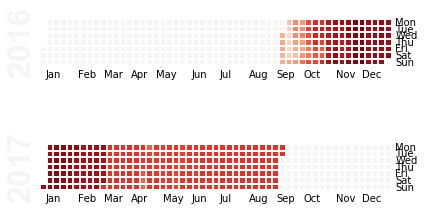

In [10]:
%matplotlib inline
import calmap
calmap.calendarplot(mean_avail)

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



(<matplotlib.figure.Figure at 0x11f8bf748>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f8b61d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ff15860>], dtype=object))

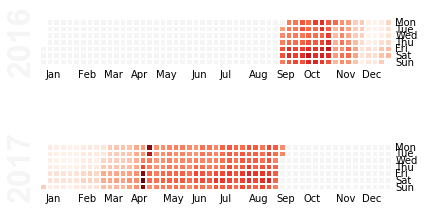

In [11]:
mean_filled_price = com_calendar.groupby('date').modeled_price.mean()
calmap.calendarplot(mean_filled_price)

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



(<matplotlib.figure.Figure at 0x11ff81d68>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ffb7710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117a00d30>], dtype=object))

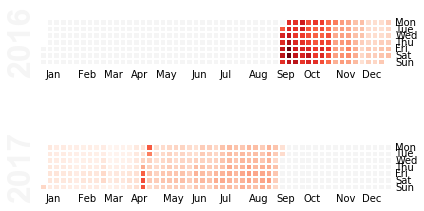

In [12]:
mean_price_available = com_calendar.groupby('date').price.mean()
calmap.calendarplot(mean_price_available)

# Creating Quarterly Revenue

In [13]:
# quarter_dates = ['2016-09-06','2016-12-06','2017-03-06','2017-06-06','2017-07-06']

# quarters = [com_calendar[com_calendar.date.isin(pd.date_range(quarter_dates[n], quarter_dates[n+1]))] for n in range(4)]
# quarters_revenue = pd.DataFrame(index = pd.Index( com_calendar.listing_id.unique(), name = 'listing_id'))
# quarters_revenue = quarters_revenue.join(listings['host_id'])
# for n,q in enumerate(quarters):
#     quarters_revenue = (quarters_revenue.join(pd.DataFrame(quarters[n].groupby('listing_id').day_revenue.sum()))).rename(columns={'day_revenue':'q'+str(n+1)+'_revenue'})

# del listings['id']


In [14]:


quarter_dates = ['2016-09-06','2016-12-06','2017-03-06','2017-06-06','2017-09-06']

quarters = [calendar[calendar.date.isin(pd.date_range(quarter_dates[n], quarter_dates[n+1]))] for n in range(4)]
quarters_revenue = pd.DataFrame(index = pd.Index(calendar.listing_id.unique(), name = 'listing_id'))
quarters_revenue = quarters_revenue.join(listings['host_id'])
for n,q in enumerate(quarters):
    quarters_revenue = (quarters_revenue.join(pd.DataFrame(quarters[n].groupby('listing_id').day_revenue.sum()))).rename(columns={'day_revenue':'q'+str(n+1)+'_revenue'})

del listings['id']


# CLEANED REGRESSION OUTPUTS

In [15]:
#IMPORTS
import numpy as np
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats


listings = pd.read_pickle('data/listings_cleaned.pkl')
#listings['analysis_table'] = listings.index
#listings['analysis_table'] = pd.DataFrame(listings.analysis_table.map(lambda x: amn_frame.loc[x]))
analysis_table = pd.merge(listings, amn_frame, left_index=True, right_index=True)
del analysis_table['translation missing enhosting_amenity_50']

#Trying to normalize ratings for each neighborhood
#ratings_table = analysis_table.groupby('neighbourhood_cleansed')['review_scores_rating'].agg([np.mean,np.std]).reset_index()
#analysis_table = pd.merge(analysis_table, ratings_table, left_on = 'neighbourhood_cleansed', right_on = 'neighbourhood_cleansed').rename(columns = {'mean':'review_scores_mean','std':'standard_deviation'})
#analysis_table['reviews_neighborhood_zscore'] = (analysis_table.review_scores_rating - analysis_table.review_scores_mean)/analysis_table.standard_deviation




In [16]:
analysis_table = pd.merge(analysis_table, pd.get_dummies(analysis_table.room_type), left_index = True, right_index = True)
#analysis_table = pd.merge(analysis_table, pd.get_dummies(analysis_table.neighbourhood_cleansed), left_index = True, right_index = True)
analysis_table = pd.merge(analysis_table, pd.get_dummies(analysis_table.property_type), left_index = True, right_index = True)
#analysis_table = pd.merge(analysis_table, pd.get_dummies(analysis_table.zipcode), left_index = True, right_index = True)

In [17]:
#Dummy Variables are intended to be n-1 #zipcode: '02472', 'Hyde Park'
cols_to_remove = ['host_id','zipcode','neighbourhood_cleansed', 'latitude', 'longitude', 'amenities', 'first_review', 'room_type','property_type', 'listed_price', 'Carbon Monoxide Detector', 'Entire home/apt','Apartment']
analysis_table['cleaning_fee'] = (analysis_table.cleaning_fee > 0)
#(pd.DataFrame(analysis_table.columns)).to_csv('analysis_table_columns.csv')
for i in cols_to_remove:
    del analysis_table[i]

In [18]:
combined_data = quarters_revenue.join(analysis_table, how='left',lsuffix='', rsuffix='_lis')
#combined_data = combined_data[combined_data['reviews_per_month'] > 3]
#CHANGED THIS FOR ANALYSIS
combined_data = combined_data[(combined_data['calculated_host_listings_count'] > 2)]# & (combined_data['reviews_per_month'] > 2.0)]
#plt.scatter(combined_data['calculated_host_listings_count'], combined_data['reviews_per_month'])

analysis_data = pd.DataFrame(combined_data)#, columns=['q1_revenue','number_of_reviews','number_of_reviews', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value'])
analysis_data.dropna(inplace=True)

#analysis_data_y = (analysis_data['q1_revenue'].apply(lambda x: math.log(x + 1))).copy()
analysis_data['review_scores_rating_zscore'] = stats.zscore(analysis_data.review_scores_rating)
analysis_data_y = analysis_data['review_scores_rating_zscore'].copy()

#withholding 'number_of_reviews_'
analysis_data_x = analysis_data.copy()
del analysis_data_x['q1_revenue']
del analysis_data_x['q2_revenue']
del analysis_data_x['q3_revenue']
del analysis_data_x['q4_revenue']

#USED FOR ESTIMATING REVIEW_SCORES_RATING
del analysis_data_x['review_scores_rating']
del analysis_data_x['review_scores_rating_zscore']
#del analysis_data_x['review_scores_accuracy']
#del analysis_data_x['review_scores_cleanliness']
#del analysis_data_x['review_scores_checkin']
#del analysis_data_x['review_scores_communication']
#del analysis_data_x['review_scores_location']
#del analysis_data_x['review_scores_value']

In [1]:
#Divided the review_scores_rating by 100 to normalize
#analysis_data_x['review_scores_rating'] = analysis_data_x['review_scores_rating'] / 10
#analysis_data['q1_revenue'] = analysis_data['q1_revenue'].apply(lambda x: math.log(x+1))


#Propensity for columns to replicate- this deals with that issue
analysis_data_x = analysis_data_x.loc[:,~analysis_data_x.columns.duplicated()]

reg = linear_model.LinearRegression()

#partition the data into training and test sets
x_train,x_test,y_train,y_test = train_test_split(analysis_data_x, analysis_data_y, test_size = 0.2, random_state = 4)

output = reg.fit(x_train,y_train)
output.coef_
predicted_answers = reg.predict(x_test)
predicted_answers[0]
y_test.iloc[2]
#mean-squared error
np.mean((predicted_answers-y_test)**2)

NameError: name 'analysis_data_x' is not defined

In [20]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('analysis_data_y ~  review_scores_location  +  review_scores_checkin  + review_scores_cleanliness + review_scores_communication + review_scores_value + review_scores_accuracy', data=analysis_data).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        analysis_data_y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     542.0
Date:                Wed, 26 Apr 2017   Prob (F-statistic):          1.71e-311
Time:                        21:59:33   Log-Likelihood:                -709.81
No. Observations:                1016   AIC:                             1434.
Df Residuals:                    1009   BIC:                             1468.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept         

training data MSE
0.247643875382
test data MSE
0.145426036989
training data R-square
0.761611886045
test data R-square
0.827919775546
Features Most Significant


,coefficient_name,estimated_value
27,review_scores_value,0.364968
11,review_scores_cleanliness,0.243944
17,Other pets,0.161276
15,Dryer,0.147840
38,review_scores_communication,0.125204
36,review_scores_checkin,0.100826
48,review_scores_accuracy,0.081208
31,Doorman,0.072865
35,review_scores_location,0.069156
24,Pets live on this property,0.056458


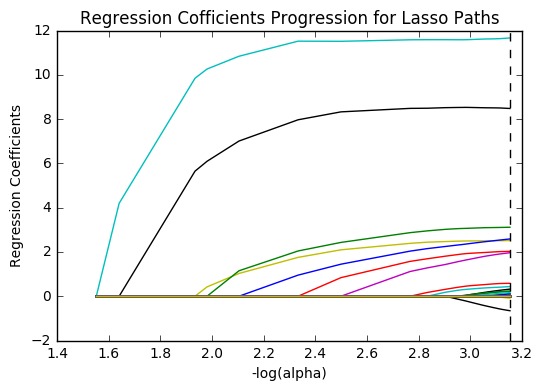

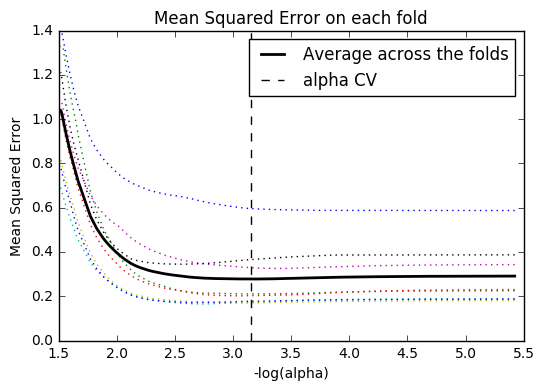

In [21]:
import matplotlib.pylab as plt
from sklearn.linear_model import LassoLarsCV

#lasso regression with 8 cross-validations selected
model=LassoLarsCV(cv=8, precompute=False).fit(x_train,y_train)

#this code is intended to extract the coefficients and their names and then to place them into a table
coefficients = dict(zip(x_train.columns, model.coef_))
coefficients_results = pd.DataFrame([(key, val) for (key, val) in coefficients.items()], 
                                    columns = ['coefficient_name','estimated_value'])

#plots coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
 label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Cofficients Progression for Lasso Paths')

#plots mean square error for each fold of the cross-validation
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
 label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
 label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error on each fold')

# MSE from training and test data
train_error = mean_squared_error(y_train, model.predict(x_train))
test_error = mean_squared_error(y_test, model.predict(x_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# R-square from training and test data
rsquared_train=model.score(x_train,y_train)
rsquared_test=model.score(x_test,y_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)
print('Features Most Significant')
coefficients_results[coefficients_results['estimated_value'] != 0].sort_values('estimated_value', ascending = False)
#ASSISTANCE FROM: https://cognosworld.wordpress.com/2016/02/15/machine-learning-lasso-regression-using-python/

In [22]:
#analysis_data['review_scores_rating_zscore'].plot(kind='hist')
?plt.plot()

(-8, 1)

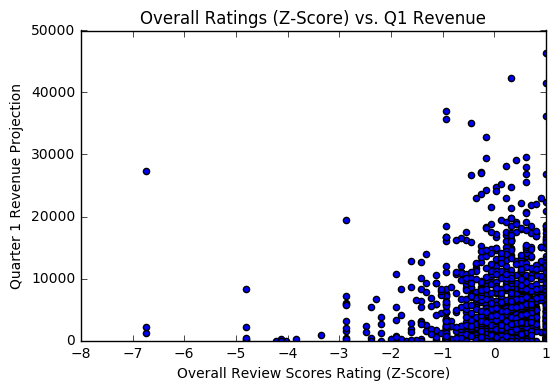

In [23]:
#revenue = analysis_data.q1_revenue.apply(lambda x: math.log(x+1))
plt.scatter(analysis_data.review_scores_rating_zscore, analysis_data.q1_revenue)#analysis_data.q1_revenue)
plt.xlabel('Overall Review Scores Rating (Z-Score)')
plt.ylabel('Quarter 1 Revenue Projection')
plt.title('Overall Ratings (Z-Score) vs. Q1 Revenue')
plt.ylim([0,50000])
plt.xlim([-8,1])



In [24]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('q1_revenue ~ review_scores_rating_zscore ', data=analysis_data).fit()

# Inspect the results
print(results.summary())
analysis_data.q1_revenue.median()

                            OLS Regression Results                            
Dep. Variable:             q1_revenue   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     18.01
Date:                Wed, 26 Apr 2017   Prob (F-statistic):           2.40e-05
Time:                        21:59:51   Log-Likelihood:                -10359.
No. Observations:                1016   AIC:                         2.072e+04
Df Residuals:                    1014   BIC:                         2.073e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept         

4647.312962621219

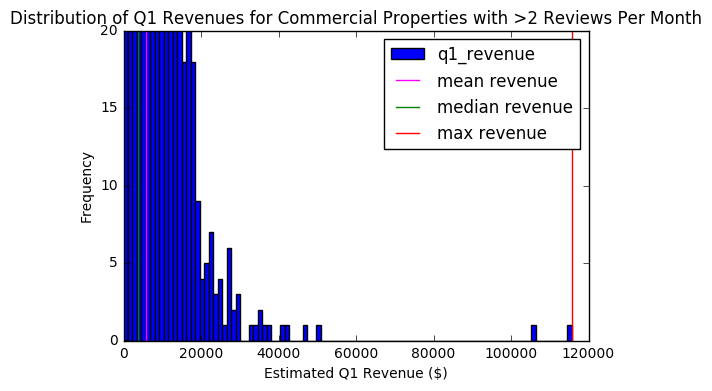

In [25]:
#analysis_data_x[analysis_data_x['Wheelchair Accessible']]['Wheelchair Accessible'].shape
combined_data.q1_revenue.plot(kind='hist', bins = 100)

comb_mean = combined_data.q1_revenue.mean()
comb_med = combined_data.q1_revenue.median()
comb_max = combined_data.q1_revenue.max()
y_max = 20
plt.ylim([0,y_max])
plt.vlines(comb_mean, 0, y_max, color='magenta', label = 'mean revenue')
plt.vlines(comb_med, 0, y_max, color='green', label = 'median revenue')
plt.vlines(comb_max, 0, y_max, color = 'red',label='max revenue')
plt.xlabel('Estimated Q1 Revenue ($)')
plt.title('Distribution of Q1 Revenues for Commercial Properties with >2 Reviews Per Month')
plt.legend(loc='upper right')



In [26]:
#-np.log10(model.cv_alphas_)
listings.columns

Index(['host_id', 'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'amenities',
       'listed_price', 'cleaning_fee', 'number_of_reviews', 'first_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')